In [1]:
#Importing libraries
import os
import imghdr
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import layers,models
from keras.models import Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [3]:
#Unzipping the folder that has images
!unzip -q moon.zip -d /content/moon

In [4]:
#Directory where the images are stored
DATA_DIR = "/content/moon/moon"

In [5]:
# Categories of moon phases
CATEGORIES = ["New Moon", "Waxing Crescent", "First Quarter", "Waxing Gibbous",
              "Full Moon", "Waning Gibbous", "Last Quarter", "Waning Crescent"]

# Load and preprocess images
IMG_SIZE = 128  # Resize images to 128x128

def load_images(data_dir, categories):
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append(img_resized)
                labels.append(class_num)
            except Exception as e:
                pass
    return np.array(data), np.array(labels)

images, labels = load_images(DATA_DIR, CATEGORIES)

# Normalize the images
images = images / 255.0

# Convert labels to categorical
labels = to_categorical(labels, num_classes=len(CATEGORIES))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(CATEGORIES), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,352 (28.20 MB)

 Trainable params: 7,393,352 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 902ms/step - accuracy: 0.2617 - loss: 2.0956 - val_accuracy: 0.5789 - val_loss: 1.3463
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 860ms/step - accuracy: 0.5239 - loss: 1.3228 - val_accuracy: 0.6053 - val_loss: 0.9877
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 687ms/step - accuracy: 0.5886 - loss: 1.0365 - val_accuracy: 0.6316 - val_loss: 0.8579
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 960ms/step - accuracy: 0.6835 - loss: 0.8217 - val_accuracy: 0.6974 - val_loss: 0.7690
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 920ms/step - accuracy: 0.7767 - loss: 0.6729 - val_accuracy: 0.7105 - val_loss: 0.7398
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 691ms/step - accuracy: 0.8058 - loss: 0.5042 - val_accuracy: 0.7500 - val_loss: 0.7754
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 672ms/step - accuracy: 0.7850 - loss: 0.5362 - val_accuracy: 0.6842 - val_loss: 0.7703
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 865ms/step - accuracy: 0.8556 - loss: 0.3978 - val_accuracy

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.7198 - loss: 1.0487
Test Accuracy: 0.6973684430122375


In [11]:
def predict_moon_phase(model, img_path):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_normalized = img_resized / 255.0
    img_reshaped = np.reshape(img_normalized, (1, IMG_SIZE, IMG_SIZE, 3))
    prediction = model.predict(img_reshaped)
    return CATEGORIES[np.argmax(prediction)]

In [12]:
#Testing model on different images
img_path = 'test.jpg'
predicted_phase = predict_moon_phase(model, img_path)
print("The predicted moon phase is:", predicted_phase)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
The predicted moon phase is: Full Moon


In [13]:
img_path = 'test1.jpg'
predicted_phase = predict_moon_phase(model, img_path)
print("The predicted moon phase is:", predicted_phase)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The predicted moon phase is: Waxing Crescent


In [14]:
img_path = 'test2.jpg'
predicted_phase = predict_moon_phase(model, img_path)
print("The predicted moon phase is:", predicted_phase)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The predicted moon phase is: Waxing Gibbous


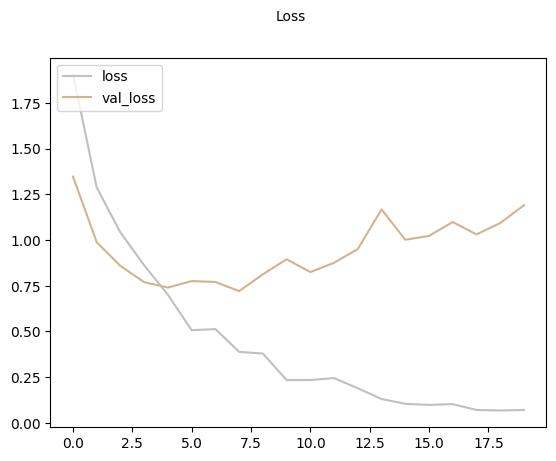

In [16]:
fig = plt.figure()
plt.plot(history.history['loss'], color='silver', label='loss')
plt.plot(history.history['val_loss'], color='tan', label='val_loss')
fig.suptitle('Loss', fontsize=10)
plt.legend(loc="upper left")
plt.show()

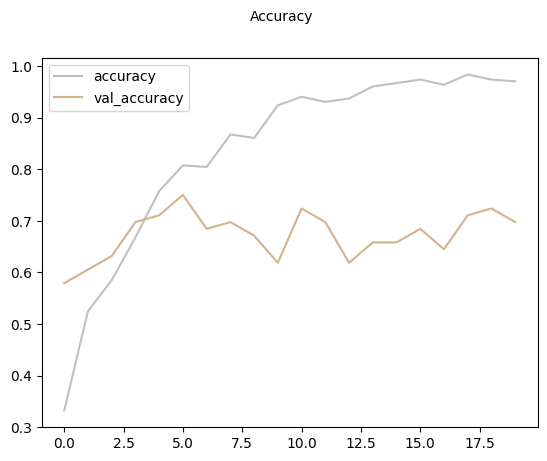

In [17]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='silver', label='accuracy')
plt.plot(history.history['val_accuracy'], color='tan', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=10)
plt.legend(loc="upper left")
plt.show()